<a href="https://colab.research.google.com/github/danai-coder/Customer-Churn-Analysis-Model/blob/Modified_Customer_Churn_Model/Customer_Churn_Analysis_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'customer-churn-dataset' dataset.
Path to dataset files: /kaggle/input/customer-churn-dataset


In [63]:
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
df = pd.read_csv('/content/customer_churn_dataset-training-master.csv')


In [65]:
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [67]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [68]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [69]:
columns_of_interest = ['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type',
                       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn']

In [70]:
df[columns_of_interest].describe()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [71]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [72]:
display(df[['Age', 'Churn']])

,Age,Churn
0,30.0,1.0
1,65.0,1.0
2,55.0,1.0
3,58.0,1.0
4,23.0,1.0
...,...,...
440828,42.0,0.0
440829,25.0,0.0
440830,26.0,0.0
440831,28.0,0.0


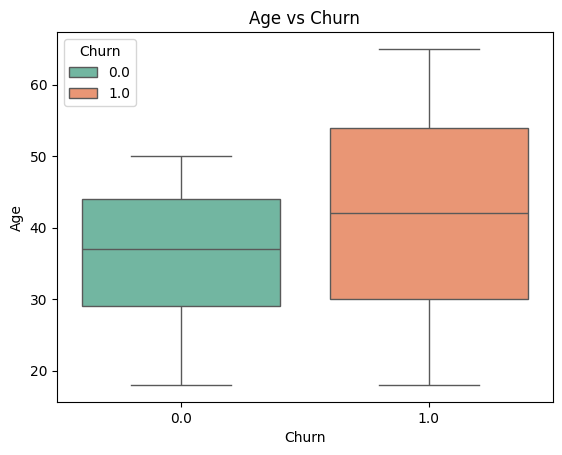

In [110]:
sns.boxplot(x='Churn', y='Age', data=df[['Age', 'Churn']], palette='Set2', hue= 'Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age vs Churn')
plt.show()

In [74]:
display(df[['Gender', 'Churn']])

,Gender,Churn
0,Female,1.0
1,Female,1.0
2,Female,1.0
3,Male,1.0
4,Male,1.0
...,...,...
440828,Male,0.0
440829,Female,0.0
440830,Male,0.0
440831,Male,0.0


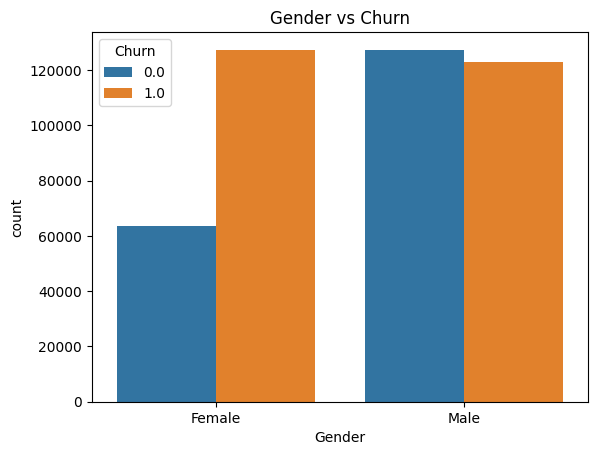

In [75]:
import seaborn as sns
gvc = df[['Gender', 'Churn']]
sns.countplot(x='Gender', hue='Churn', data=gvc)
plt.title('Gender vs Churn')
plt.show()

,Tenure,Churn
0,39.0,1.0
1,49.0,1.0
2,14.0,1.0
3,38.0,1.0
4,32.0,1.0
...,...,...
440828,54.0,0.0
440829,8.0,0.0
440830,35.0,0.0
440831,55.0,0.0


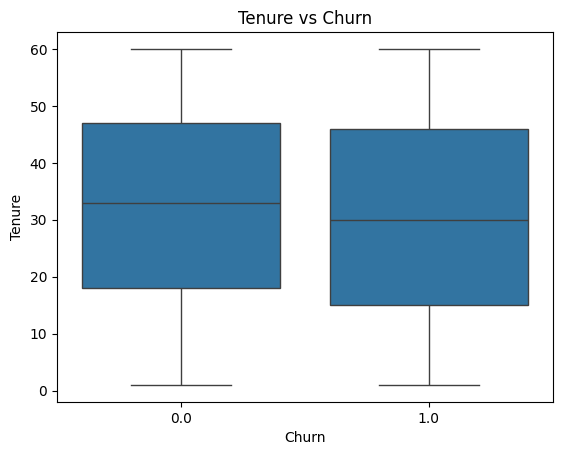

In [76]:
display(df[['Tenure', 'Churn']])
tvc = df[['Tenure', 'Churn']]
sns.boxplot(x='Churn', y='Tenure', data=tvc)
plt.title('Tenure vs Churn')
plt.show()

,Usage Frequency,Churn
0,14.0,1.0
1,1.0,1.0
2,4.0,1.0
3,21.0,1.0
4,20.0,1.0
...,...,...
440828,15.0,0.0
440829,13.0,0.0
440830,27.0,0.0
440831,14.0,0.0


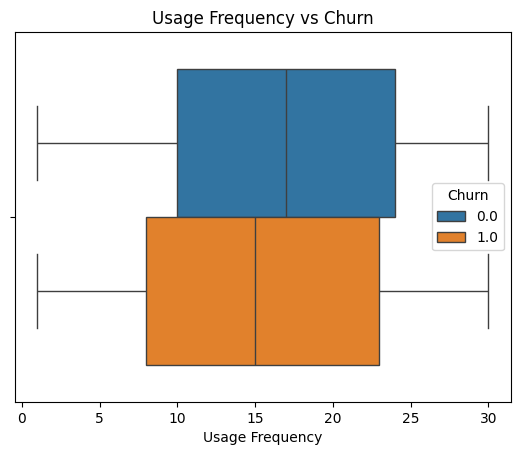

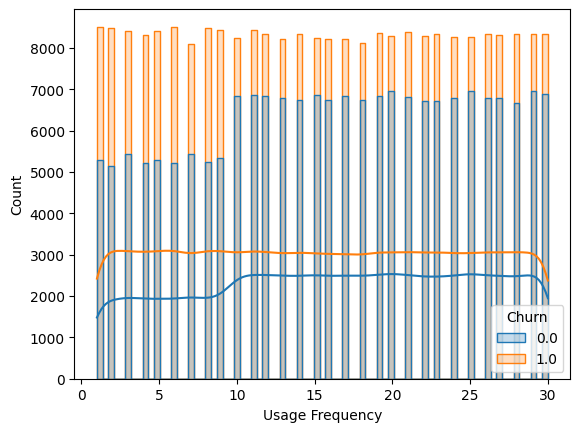

In [77]:
display(df[['Usage Frequency', 'Churn']])
ufvc = df[['Usage Frequency', 'Churn']]
sns.boxplot(x='Usage Frequency', hue='Churn', data=ufvc)
plt.title('Usage Frequency vs Churn')
plt.show()
sns.histplot(data=ufvc, x="Usage Frequency", hue="Churn", kde=True, element="step")
plt.show()


,Support Calls,Churn
0,5.0,1.0
1,10.0,1.0
2,6.0,1.0
3,7.0,1.0
4,5.0,1.0
...,...,...
440828,1.0,0.0
440829,1.0,0.0
440830,1.0,0.0
440831,2.0,0.0


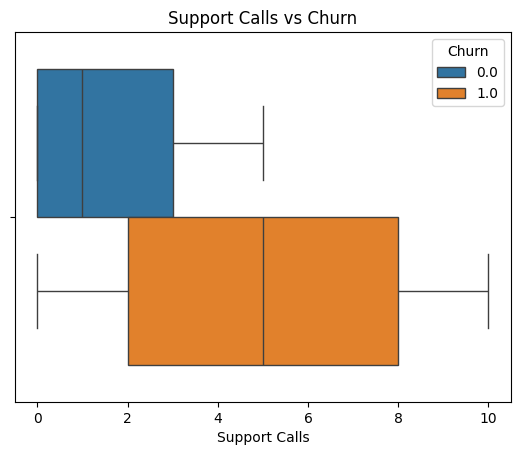

In [78]:
display(df[['Support Calls', 'Churn']])
scvc = df[['Support Calls', 'Churn']]
sns.boxplot(x='Support Calls', hue='Churn', data=scvc)
plt.title('Support Calls vs Churn')
plt.show()

,Payment Delay,Churn
0,18.0,1.0
1,8.0,1.0
2,18.0,1.0
3,7.0,1.0
4,8.0,1.0
...,...,...
440828,3.0,0.0
440829,20.0,0.0
440830,5.0,0.0
440831,0.0,0.0


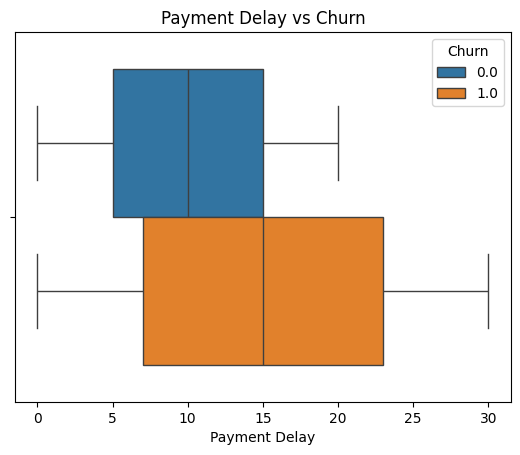

In [79]:
display(df[['Payment Delay', 'Churn']])
pdvc = df[['Payment Delay', 'Churn']]
sns.boxplot(x='Payment Delay', hue='Churn', data=pdvc)
plt.title('Payment Delay vs Churn')
plt.show()

,Subscription Type,Churn
0,Standard,1.0
1,Basic,1.0
2,Basic,1.0
3,Standard,1.0
4,Basic,1.0
...,...,...
440828,Premium,0.0
440829,Premium,0.0
440830,Standard,0.0
440831,Standard,0.0


Text(0.5, 1.0, 'Subscription Type vs Churn')

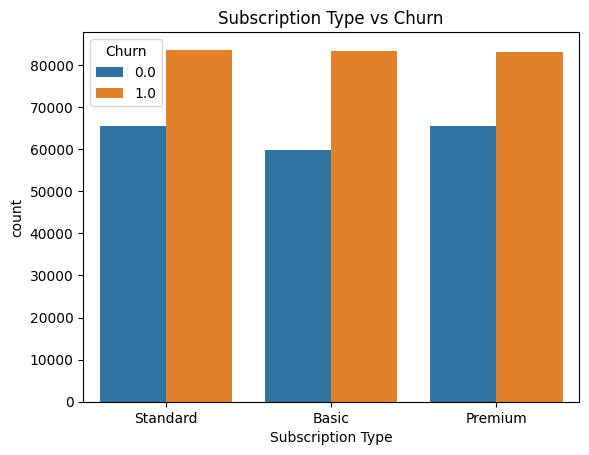

In [80]:
display(df[['Subscription Type', 'Churn']])
stvc = df[['Subscription Type', 'Churn']]
sns.countplot(x='Subscription Type', hue='Churn', data=stvc)
plt.title('Subscription Type vs Churn')

,Contract Length,Churn
0,Annual,1.0
1,Monthly,1.0
2,Quarterly,1.0
3,Monthly,1.0
4,Monthly,1.0
...,...,...
440828,Annual,0.0
440829,Annual,0.0
440830,Quarterly,0.0
440831,Quarterly,0.0


Text(0.5, 1.0, 'Contract Length vs Churn')

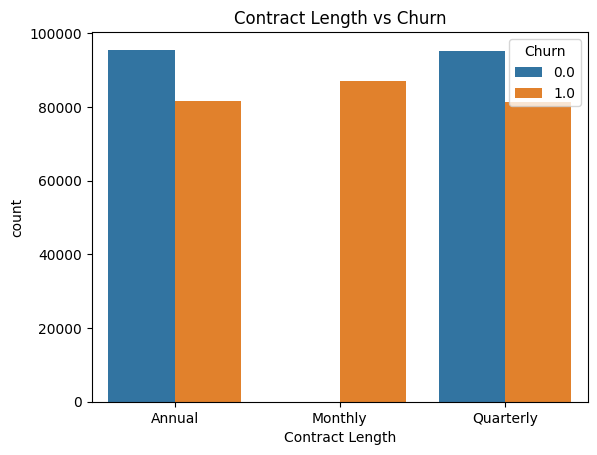

In [81]:
display(df[['Contract Length', 'Churn']])
clvc = df[['Contract Length', 'Churn']]
sns.countplot(x='Contract Length', hue='Churn', data=clvc)
plt.title('Contract Length vs Churn')

,Total Spend,Churn
0,932.00,1.0
1,557.00,1.0
2,185.00,1.0
3,396.00,1.0
4,617.00,1.0
...,...,...
440828,716.38,0.0
440829,745.38,0.0
440830,977.31,0.0
440831,602.55,0.0


Text(0.5, 1.0, 'Total Spend vs Churn')

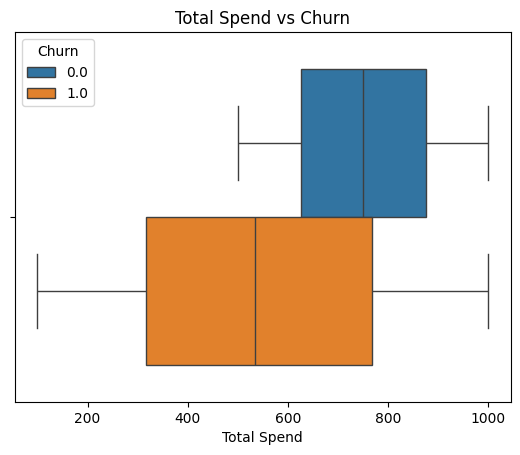

In [82]:
display(df[['Total Spend', 'Churn']])
tsvc = df[['Total Spend', 'Churn']]
sns.boxplot(x='Total Spend', hue='Churn', data=tsvc)
plt.title('Total Spend vs Churn')

,Last Interaction,Churn
0,17.0,1.0
1,6.0,1.0
2,3.0,1.0
3,29.0,1.0
4,20.0,1.0
...,...,...
440828,8.0,0.0
440829,2.0,0.0
440830,9.0,0.0
440831,2.0,0.0


Text(0.5, 1.0, 'Last Interaction vs Churn')

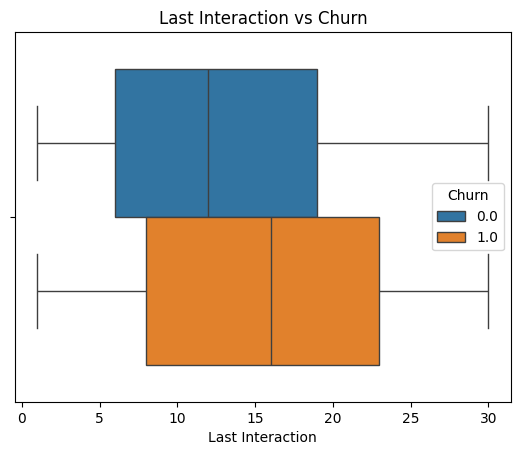

In [83]:
display(df[['Last Interaction', 'Churn']])
livc = df[['Last Interaction', 'Churn']]
sns.boxplot(x='Last Interaction', hue='Churn', data=livc)
plt.title('Last Interaction vs Churn')

In [84]:
#seperate the numerical columns and categorical columns for to fix the null values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [85]:
numerical_cols


['CustomerID',
 'Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [86]:
categorical_cols

['Gender', 'Subscription Type', 'Contract Length']

In [87]:
#replace the NULL values in the numerical col with the mean
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

/tmp/ipython-input-3539015193.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [88]:
df[numerical_cols].isnull().sum()

,0
CustomerID,0
Age,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Total Spend,0
Last Interaction,0
Churn,0


In [89]:
for col in categorical_cols:
    df.dropna(subset=[col], inplace=True)

In [90]:
df[categorical_cols].isnull().sum()

,0
Gender,0
Subscription Type,0
Contract Length,0


In [91]:
#save the cleaned data set
df.to_csv('cleaned_customer_churn_dataset.csv', index=False)


In [92]:
numerical_cols = df.select_dtypes(include=['number'])
# visualize the carrelation between the numerical_cols
numerical_cols.corr()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839365
Age,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,-0.125356,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,-0.839365,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


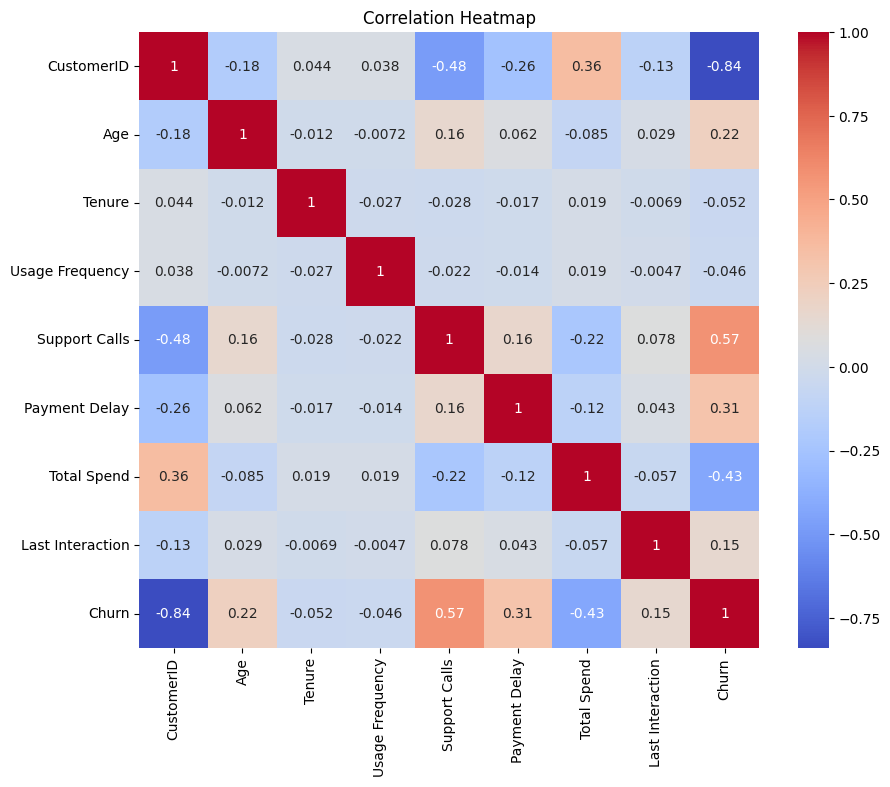

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

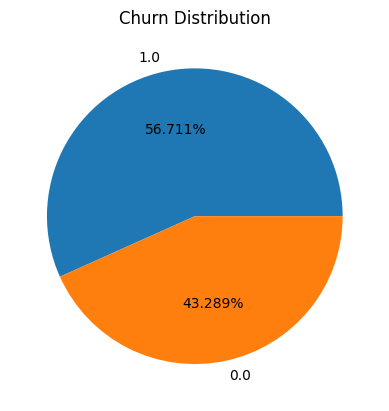

In [94]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.3f%%')
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

In [95]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

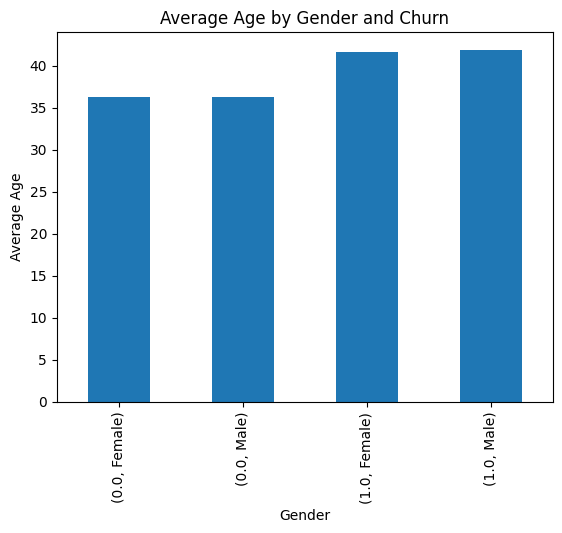

In [96]:
df.groupby(['Churn','Gender'])['Age'].mean().plot(kind='bar')
plt.title('Average Age by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

<Axes: xlabel='Churn'>

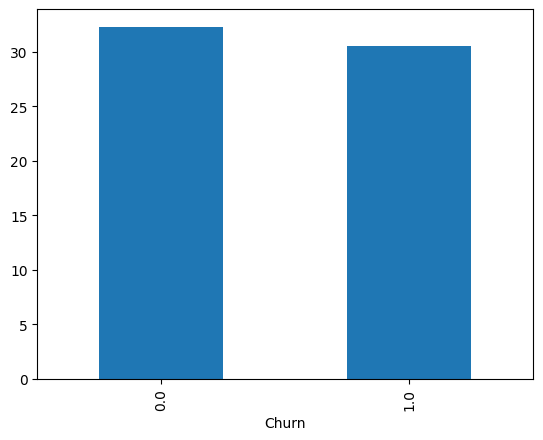

In [97]:
df.groupby('Churn')['Tenure'].mean().plot(kind= 'bar')

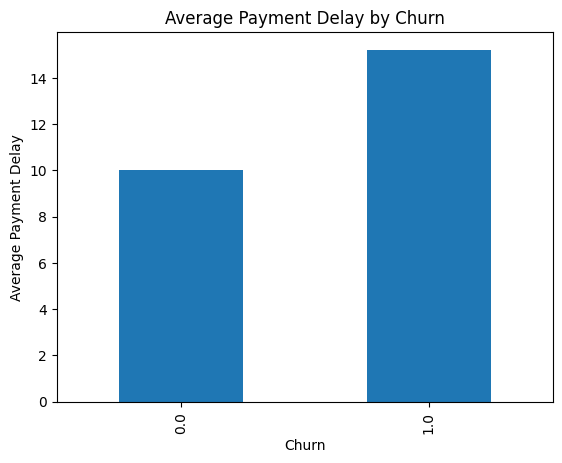

In [98]:
df.groupby('Churn')['Payment Delay'].mean().plot(kind='bar')
plt.title('Average Payment Delay by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Payment Delay')
plt.show()

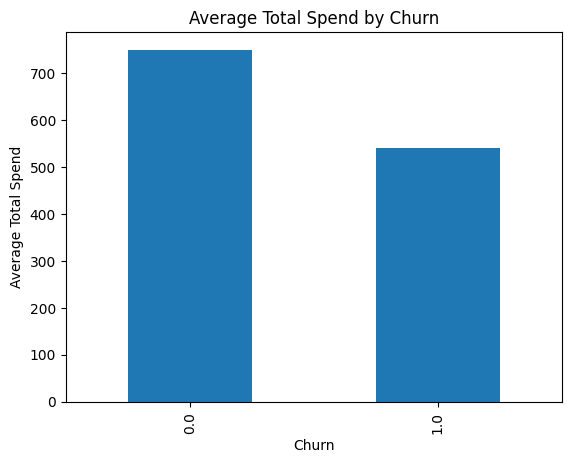

In [99]:
df.groupby('Churn')['Total Spend'].mean().plot(kind='bar')
plt.title('Average Total Spend by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Total Spend')
plt.show()

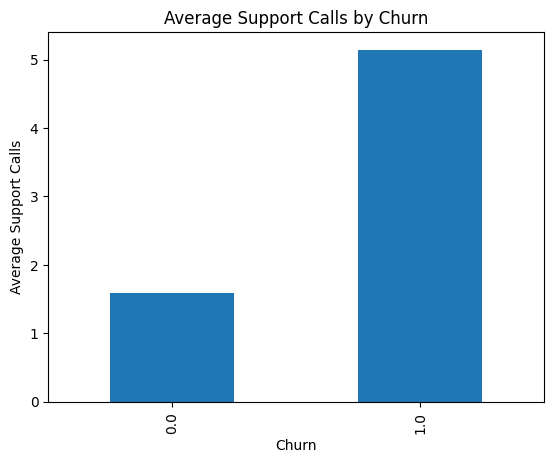

In [100]:
df.groupby('Churn')['Support Calls'].mean().plot(kind='bar')
plt.title('Average Support Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Support Calls')
plt.show()

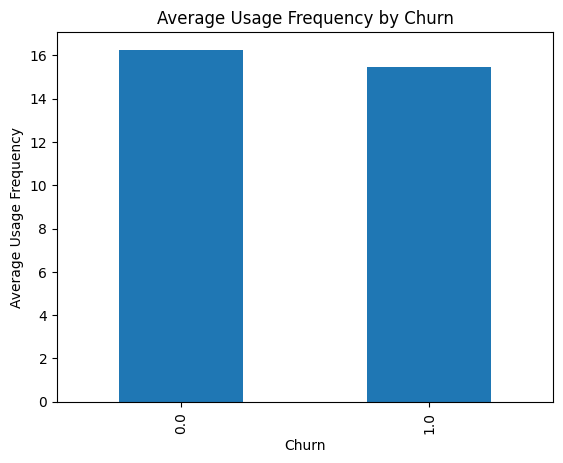

In [101]:
df.groupby('Churn')['Usage Frequency'].mean().plot(kind='bar')
plt.title('Average Usage Frequency by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Usage Frequency')
plt.show()

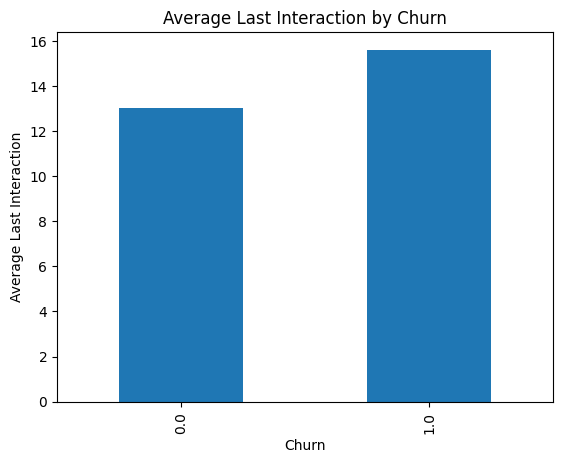

In [102]:
df.groupby('Churn')['Last Interaction'].mean().plot(kind='bar')
plt.title('Average Last Interaction by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Last Interaction')
plt.show()

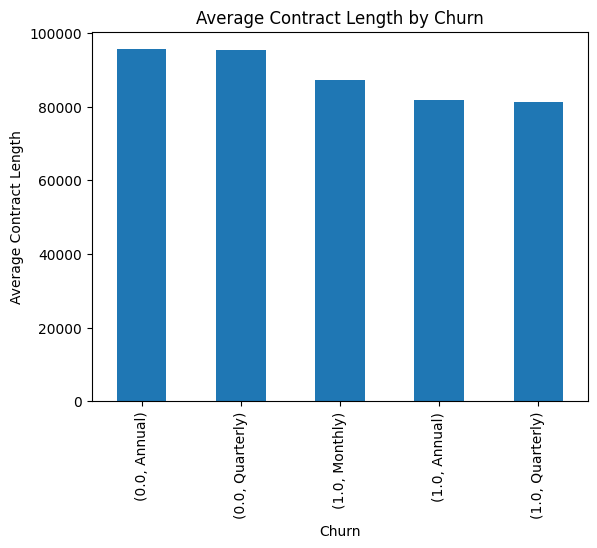

In [103]:
df.groupby('Churn')['Contract Length'].value_counts().plot(kind='bar')
plt.title('Average Contract Length by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Contract Length')
plt.show()